---   

# 프로젝트 명 : 유기질 비료 연구와 제약 실험 사례를 통한 통계적 개념 이해
## 프로젝트 목표
    - 머신러닝에 이용되는 통계적 개념을 문제 상황에 적용해봅니다.
    - 2가지 사례를 통해 강의에서 배운 확률 및 통계 개념을 이해하고 의미를 해석해봅니다.

## 프로젝트 구성
    - STEP 1 : 범주형자료를 통해 공분산과 피어슨 상관계수를 확인하고, 두 변수의 상관계수를 알아봅니다.
    - STEP 2 : 통계 가설을 세우고 정규분포의 유의수준을 확인해봅니다.

- 작성자: 이정훈 감수자

---

# STEP1. 범주형자료, 공분산, 상관계수

 
 유기질 비료 연구단체는 해마다 비료 투입량 당 생산량을 조사하고 있다. 지난 10년간 조사한 10아르(약 300평)당 유기질비료 투입량(Input)과 벼 생산량(Output) 데이터는 아래와 같다.

확인한 데이터를 산점도로 시각화해볼 수 있다.

In [1]:
import pandas as pd

years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]  # 1~10년

Input = [681, 685, 647, 722, 742, 671, 689, 657, 706, 722] # 10년간 유기질 비료 투입량
Output = [193, 184, 168, 245, 250, 182, 201, 178, 213, 234] # 10년간 벼 생산

ind = ['Input', 'Output'] # 인덱스 명
data = [Input, Output] # 데이터
pd.DataFrame(data, columns=years, index=ind)

2010  2011  2012  2013  2014  2015  2016  2017  2018  2019
Input    681   685   647   722   742   671   689   657   706   722
Output   193   184   168   245   250   182   201   178   213   234

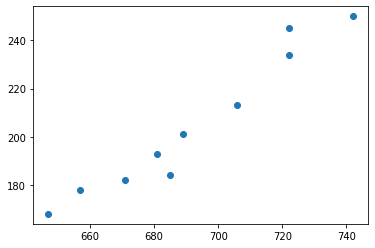

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Input, Output)
plt.show()

### STEP1 - Q1. 모집단에서의 공분산의 정의와 표본에서의 공분산의 정의를 서술하시오.

#### Answer) 모집단에서의 공분산의 정의는?
- 두 변수 x, y 에서 각각의 평균 $\mu_x, \mu_y$ 를 뺀 곱 $(x_{i} - \mu_x)(y_{i} - \mu_y)$ 의 전체 합에서 모집단 개체의 수 N 으로 나눈 값
---
$$모공분산 = {\sum_{i=1}^N (x_{i} - \mu_x)(y_{i} - \mu_y) \over N}$$

#### Answer) 표본에서의 공분산의 정의는?
- 두 변수 x, y 에서 각각의 표본평균 $\bar{X}, \bar{Y}$ 를 뺀 곱 $(x_{i} - \bar{X})(y_{i} - \bar{Y})$ 의 전체 합에서 표본 관측치의 개수 n-1 으로 나눈 값
---
$$표본공분산 = {\sum_{i=1}^n (x_{i} - \bar{X})(y_{i} - \bar{Y}) \over n-1}$$

### [리뷰어 답변]
#### 피드백
- 공분산의 정의는 아래와 같습니다 $$E((X-E(X))(Y-E(Y))$$
- 자료가 모두 주어져 있다면 말씀하신대로 계산 가능합니다.
- 표본 공분산의 경우 잘 서술하셨습니다.

### STEP1 - Q2. 공분산의 의미를 약술하시오.

#### Answer) 공분산의 의미는?
- 두 개의 확률 변수의 선형적인 관계가 어떤한가를 나타낸 척도 이다.
- 공분산이 양의 값이라는 의미는 두 변수 X 와 Y가 각각의 중심점에서 같은 방향으로 멀어졌다는 것을 의미
- 반대로 공분산이 음의 값이라는 의미는 X 와 Y가 각각의 중심점으로 반대 방향으로 멀어졌다는 것을 의미
- X, Y 가 독립이면 Cov(X, Y) = 0 이다.

### [리뷰어 답변]
#### 피드백
- 매우 잘 서술해주셨습니다. 풀어쓰면 아래와 같습니다.
- 공분산 식의 구조 상 X가 X의 평균보다 커질때, Y가 Y의 평균보다 커지는 경향성이 생기면 양의 값, Y의 평균보다 작아지는 경향성이 생기면 음의값을 가지게 됩니다. 그리고 해당 커지는 정도가 클수록 공분산의 절대값은 커지게 됩니다. 다시말해 두자료의 평균을 중심으로 서로 같은 방향으로 움직이면 양의값, 서로 반대방향으로 움직이면 음의 값을 가지며 그 커지는 정도에 따라 크기를 가지는 값이라고 설명해주시면 됩니다.
- X, Y의 평균이 각각 0이라고 했을 때는 원점을 기준으로 4등분을 하여서 1사분면과 3사분면에 자료가 위치하면 양의 선형관계를 2사분면과 4사분면에 자료가 위치하면 음의 선형관계를 갖는다고 설명할 수도 있습니다.


### STEP1 - Q3. 두 변수(Input, Output)에 대한 공분산을 구하고 그것을 통하여 산점도에서 생산량과 비료투입량 관계를 서술하시오.

#### Answer) 두 변수의 공분산은? (단답식x, 서술하시오)
- 투입량(Input) 을 X, 생산량(Output) 을 Y 라고 하면
- 아래 계산으로부터 각각의 평균 $\mu_x = 692.2$, $\mu_y = 204.8$ 로 구해지며
- $(X - \mu_x)(Y - \mu_y)$ 의 전체 합에서 N=10 으로 나누면
- 아래 와 같이 공분산은 781.64 로 구해진다.



In [3]:
import numpy as np

X = Input
Y = Output
N = len(years)

# 평균
x_mean = np.mean(Input)
y_mean = np.mean(Output)
print(f'μx = {x_mean}, μy = {y_mean}')

# 공분산
cov = sum( (X-x_mean) * (Y-y_mean) ) / N
# cov = sum( (X-x_mean) * (Y-y_mean) ) / (N-1)
print(f'공분산 = {cov}')

μx = 692.2, μy = 204.8
공분산 = 781.64


#### Answer) 생산량-비료투입량의 관계
- 공분산의 부호를 통하여 두 변수의 선형관계를 대략적으로 추측할 수 있다
- 공분산이 양의 값이므로 비료투입량이 많아 질 수록 생산량도 늘어 난다고 볼 수 있다.
- 단 공분산은 두 변수의 측정 단위에 따라 크기가 달라지므로 공분산의 크기 자체로 두 확률변수의 선형관계를 판단하는 것은 부적절하다. 
- 선형관계를 판단하는 수치로는 공분산을 표준화한 상관계수를 사용 할 수 있다.

### [리뷰어 답변]
#### 피드백
- 말씀하신대로 공분산의 크기의 경우 비교할 대상이 없다면 크다 작다를 판단할 수는 없습니다. 이를 보완하기 위한 것이 후에 서술할 상관계수 값입니다.
- 양의 상관관계임을 이야기할 수 있고 비료투입량이 커짐에따라 생산량도 높아진다고 할 수 있습니다.


### STEP1 - Q4. 두 변수(Input, Output)에 대한 피어슨 상관계수를 구하시오.

#### Answer) 피어슨 상관계수를 구하시오.
- 상관계수는 공분산을 단위화한 값
- 위에 주어진 공분산을 $\sqrt{Var(X)Var(Y)}$ 나누어 구할 수 있으며
- 아래 계산으로 부터 Var(X)=836.56, Var(Y)=775.76
- 아래와 같이 상관계수는 0.970274 로 구해진다.

In [4]:
import math

# 분산
x_var = sum([(X-x_mean)**2 for X in X]) / N
y_var = sum([(Y-y_mean)**2 for Y in Y]) / N
print(f'Var(X) = {x_var}, Var(Y) = {y_var}')

# 상관계수
corr = cov / math.sqrt(x_var*y_var)
print(f'상관계수 = {corr}')

Var(X) = 836.5600000000001, Var(Y) = 775.76
상관계수 = 0.9702743201852994


### [리뷰어 답변]
#### 피드백
- 잘 계산하셨습니다.


# STEP2. 가설검정, P-value


## 가설을 세우고 유의수준을 통해서 검정을 해볼수 있다.


### 한 제약회사에서 생산하고 있는 기존의 진통제는 진통 효과가 나타나는 시간이 평균 30분, 표준편차가 5분인 것으로 알려져 있다. 새로운 진통제를 개발한 연구원들은 새로운 진통제의 효과가 더 빨리 나타난다고 주장한다. 회사의 경영진은 이를 확인하기 위하여 50명의 환자를 임의추출하여 새로운 진통제를 복용시킨 후, 진통 효과가 나타나는 시간의 평균 $\overline{X}$를 조사하기로 하였다. 

### STEP2 - Q1. 위 조사를 위하여 귀무가설과 대립가설을 세우시오.


#### Answer) 귀무가설
- 새로운 진통제의 효과는 평균 30분 이상이다.
- H0 : 𝜇 >= 30

#### Answer) 대립가설
- 새로운 진통제의 효과는 평균 30분 미만이다.
- H1 : 𝜇 < 30

### [리뷰어 답변]
#### 피드백
- 아주 잘 서술하셨습니다.


### STEP2 - Q2. 유의수준에 대하여 간단히 약술하시오.


#### Answer) 유의수준이란?
- 귀무가설이 실제로 참일 때 귀무가설을 잘못 기각할 확률을 제1종 오류라고 하며 제1종 오류의 위험성을 부담할 최대 확률을 유의수준 이라고 함.
- 보통 α로 나타내며 유의수준 0.05에서 기각되었다라고 말하는데, 이것은 곧 우리가 잘못된 의사결정을 내릴 확률이 0.05라는 것을 의미

### [리뷰어 답변]
#### 피드백
- 제1종 오류를 범할 확률의 최대 허용한계를 유의수준이라 하고, 기호$\alpha$로 나타냅니다.


### STEP2 - Q3. 새로운 진통제의 효과가 나타나는 시간은 표준편차가 5분인 정규분포를 따른다고 할 때, 기각역이 $X \leq 28.5 $ 인 검정법이 유의수준 5%인 검정임을 확인하여라.

#### Answer) 단답x, 서술하시오.
- H0 : 𝜇 >= 30, H1 : 𝜇 < 30, 𝜎 = 5, n = 50 이며
- 표준편차를 알고 있는 경우 정규분포적용 $$Z = {\bar{X} - \mu_0\over{\sigma / \sqrt{n}}}$$
- 유의수준 5% : $Z_{0.05} = 1.645$
- $$Z = {\bar{X} - \mu_0\over{\sigma / \sqrt{n}}} \le -Z_{0.05}$$
- 따라서 $$\bar{X} \le \mu_0 {-Z_{0.05}{\sigma \over \sqrt{n}}}$$
- ${\sigma \over \sqrt{n}} = {5 \over \sqrt{50}} = 0.707$
- $-Z_{0.05} \times 0.707 = -1.163$
- $$\bar{X} \le 30 − 1.163 = 28.837$$

### [리뷰어 답변]
#### 피드백
- 아주 정확히 잘 서술하셨고 유의수준 5%인 검정을 찾아주셨습니다.
- 또한, 표본 평균이 28.5 이하인 경우에는 유의수준 5% 하에서 귀무가설을 기각합니다.


In [1]:
Z=(28.5-30)/(5/(50**0.5))
from scipy.stats import norm
norm.cdf(Z)

0.016947426762344623